
4. Build some simple linear models that include no transformations or interac# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.tions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

**Lab Responses:**

4. Model 1 uses all predictors and it has lower RMSE values and higher $R^2$ values than Model 2. This means that it makes more accurate predictions on both the training and test sets. This shows that including all available predictors explains more of the variation in price rather than just using Beds and Room Type.
5. The partial $R^2$ values are very low for all features, which means they do not explain much of the variation in price on their own. In particular, Beds has an $R^2$ of 0.18, while Review Scores Rating, Number of Records, and Number of Reviews have $R^2$ values close to 0, showing no clear linear relationship.
6. The more complex model that I just built is better than the simpler ones because it has a higher $R^2$ value (0.70 as opposed to 0.53) and a lower RMSE, meaning it predicts price more accurately.
7. The simple models did not predict prices well as they had low $R^2$ values and high RMSE. The complex model, with the transformations and interactions, performed much better. This proves that more detailed features can improve predictions. This additionally shows that simple models may underfit by missing important patterns, while overly complex models could overfit if they fit the training data too closely but fail on new data. Ultimately, finding the right balance is important for making a good model.
8. The Lasso model selected features related to review scores, number of reviews, neighborhood, property type, room type, and zip codes. Its performance was similar to the simpler models, with a training RMSE of 68.85, test RMSE of 67.87, and $R^2$ of 0.53.

Data Head:
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  Revi

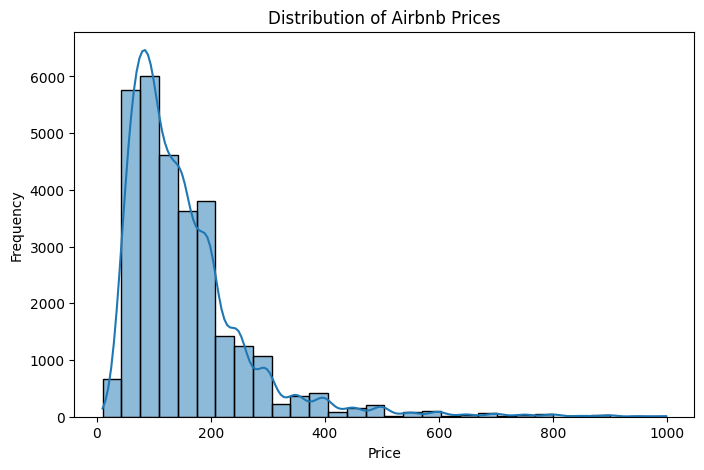

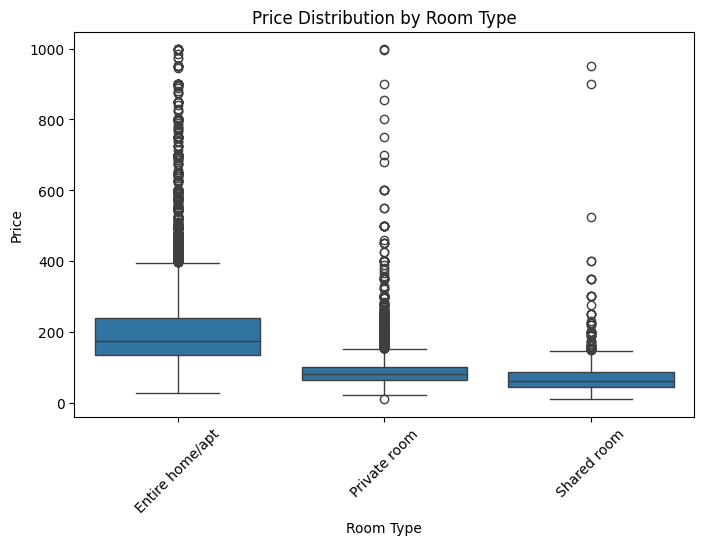

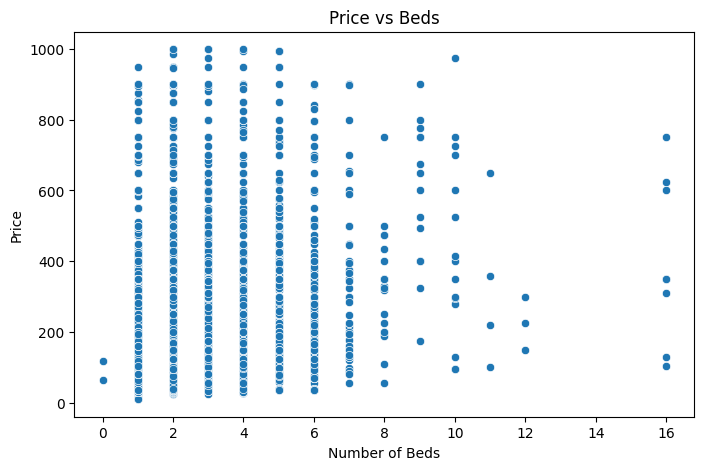


Training set shape: (17567, 216)
Test set shape: (4392, 216)

Model 1: Using All Predictors
Training RMSE: 68.82
Training R2: 0.53
Test RMSE: 67.90
Test R2: 0.53

Model 2: Using Selected Predictors (Beds + Room Type)
Training RMSE: 79.19
Training R2: 0.38
Test RMSE: 78.72
Test R2: 0.37


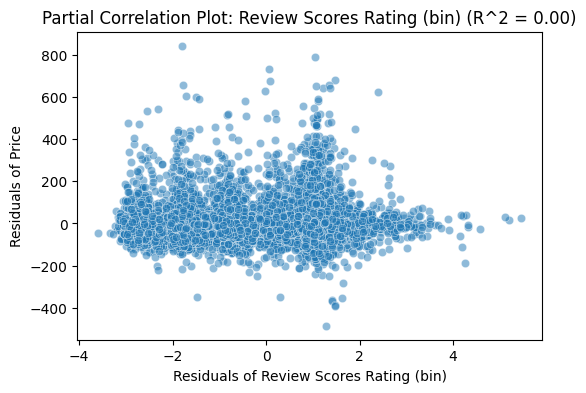

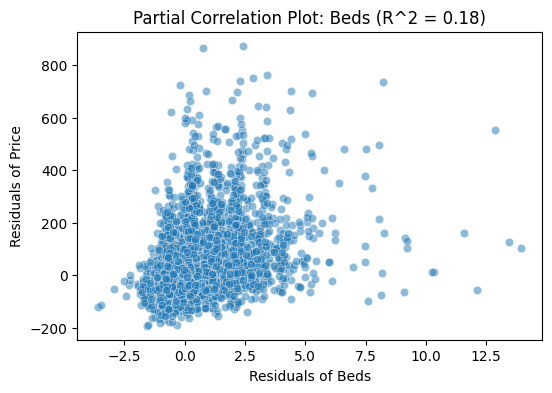

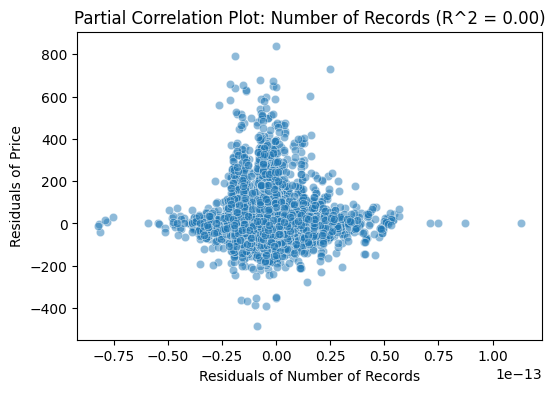

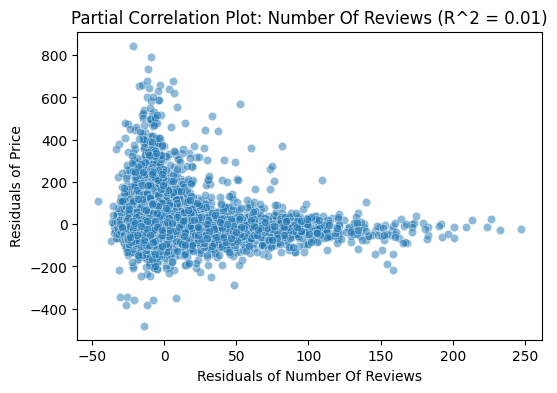

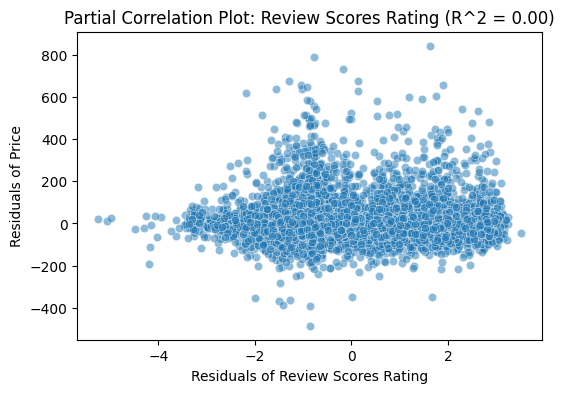


Model with Transformations & Interactions
Training RMSE: 0.31
Training R2: 0.71
Test RMSE: 0.31
Test R2: 0.70

Selected Features by Lasso:
['Review Scores Rating (bin)', 'Beds', 'Number Of Reviews', 'Review Scores Rating', 'Neighbourhood_Manhattan', 'Neighbourhood_Queens', 'Neighbourhood_Staten Island', 'Property Type_Bed & Breakfast', 'Property Type_Boat', 'Property Type_Cabin', 'Property Type_Camper/RV', 'Property Type_Castle', 'Property Type_Chalet', 'Property Type_Condominium', 'Property Type_House', 'Property Type_Hut', 'Property Type_Lighthouse', 'Property Type_Loft', 'Property Type_Other', 'Property Type_Townhouse', 'Property Type_Treehouse', 'Room Type_Private room', 'Room Type_Shared room', 'Zipcode_7105.0', 'Zipcode_10001.0', 'Zipcode_10003.0', 'Zipcode_10004.0', 'Zipcode_10005.0', 'Zipcode_10006.0', 'Zipcode_10007.0', 'Zipcode_10009.0', 'Zipcode_10010.0', 'Zipcode_10011.0', 'Zipcode_10012.0', 'Zipcode_10013.0', 'Zipcode_10014.0', 'Zipcode_10016.0', 'Zipcode_10017.0', 'Zipco

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

#Q1
df = pd.read_csv('data/airbnb_hw.csv')
print("Data Head:")
print(df.head())
print("\nData Info:")
print(df.info())
df = df.dropna(subset=['Price'])
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Neighbourhood ', 'Property Type', 'Room Type', 'Zipcode'])

print("\nDescriptive Statistics for Price:")
print(df['Price'].describe())

plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Room Type', y='Price', data=df)
plt.title("Price Distribution by Room Type")
plt.xticks(rotation=45)
plt.show()

if 'Beds' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='Beds', y='Price', data=df)
    plt.title("Price vs Beds")
    plt.xlabel("Number of Beds")
    plt.ylabel("Price")
    plt.show()

#Q2
df.columns = [col.strip() for col in df.columns]
categorical_cols = ['Neighbourhood', 'Property Type', 'Room Type', 'Zipcode']
df_dummies = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
drop_cols = ['Host Id', 'Host Since', 'Name']
df_dummies.drop(columns=[col for col in drop_cols if col in df_dummies.columns], inplace=True)

#Q3
df_dummies = df_dummies.dropna()
X = df_dummies.drop(['Price'], axis=1)
y = df_dummies['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

#Q4
model_all = LinearRegression()
model_all.fit(X_train, y_train)

y_train_pred_all = model_all.predict(X_train)
y_test_pred_all = model_all.predict(X_test)

rmse_train_all = np.sqrt(mean_squared_error(y_train, y_train_pred_all))
r2_train_all = r2_score(y_train, y_train_pred_all)

rmse_test_all = np.sqrt(mean_squared_error(y_test, y_test_pred_all))
r2_test_all = r2_score(y_test, y_test_pred_all)

print("\nModel 1: Using All Predictors")
print(f"Training RMSE: {rmse_train_all:.2f}")
print(f"Training R2: {r2_train_all:.2f}")
print(f"Test RMSE: {rmse_test_all:.2f}")
print(f"Test R2: {r2_test_all:.2f}")

cols_simple = ['Beds'] + [col for col in X.columns if col.startswith('Room Type_')]
X_simple = X[cols_simple]

X_train_simple, X_test_simple, _, _ = train_test_split(X_simple, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)

y_train_pred_simple = model_simple.predict(X_train_simple)
y_test_pred_simple = model_simple.predict(X_test_simple)

rmse_train_simple = np.sqrt(mean_squared_error(y_train, y_train_pred_simple))
r2_train_simple = r2_score(y_train, y_train_pred_simple)

rmse_test_simple = np.sqrt(mean_squared_error(y_test, y_test_pred_simple))
r2_test_simple = r2_score(y_test, y_test_pred_simple)

print("\nModel 2: Using Selected Predictors (Beds + Room Type)")
print(f"Training RMSE: {rmse_train_simple:.2f}")
print(f"Training R2: {r2_train_simple:.2f}")
print(f"Test RMSE: {rmse_test_simple:.2f}")
print(f"Test R2: {r2_test_simple:.2f}")


def partial_correlation_plot(X, y, var):
    X_mk = X.drop(var, axis=1)

    reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y)
    r_y = y - reg_y.predict(X_mk)
    reg_k = LinearRegression(fit_intercept=False).fit(X_mk, X[var])
    r_x = X[var] - reg_k.predict(X_mk)

    reg_partial = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1), r_y.to_numpy())
    partial_r2 = reg_partial.score(r_x.to_numpy().reshape(-1, 1), r_y.to_numpy())

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=r_x, y=r_y, alpha=0.5)
    plt.title(f'Partial Correlation Plot: {var} (R^2 = {partial_r2:.2f})')
    plt.xlabel(f'Residuals of {var}')
    plt.ylabel('Residuals of Price')
    plt.show()


numeric_features = ['Review Scores Rating (bin)', 'Beds', 'Number of Records', 'Number Of Reviews', 'Review Scores Rating']
for feature in numeric_features:
    partial_correlation_plot(X_train, y_train, feature)



#Q6
df_transformed = df_dummies.copy()

df_transformed['Log_Price'] = np.log1p(df_transformed['Price'])
df_transformed['Log_Number_Of_Reviews'] = np.log1p(df_transformed['Number Of Reviews'])

df_transformed['Beds_RoomType'] = df_transformed['Beds'] * df_transformed['Room Type_Private room']
df_transformed['Review_Reviews'] = df_transformed['Review Scores Rating'] * df_transformed['Number Of Reviews']

df_transformed['Beds_Squared'] = df_transformed['Beds'] ** 2

X_transformed = df_transformed.drop(columns=['Price', 'Log_Price'])  # Drop original price
y_transformed = df_transformed['Log_Price']

X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

model_complex = LinearRegression()
model_complex.fit(X_train_trans, y_train_trans)

y_train_pred_trans = model_complex.predict(X_train_trans)
y_test_pred_trans = model_complex.predict(X_test_trans)

rmse_train_trans = np.sqrt(mean_squared_error(y_train_trans, y_train_pred_trans))
r2_train_trans = r2_score(y_train_trans, y_train_pred_trans)

rmse_test_trans = np.sqrt(mean_squared_error(y_test_trans, y_test_pred_trans))
r2_test_trans = r2_score(y_test_trans, y_test_pred_trans)

print("\nModel with Transformations & Interactions")
print(f"Training RMSE: {rmse_train_trans:.2f}")
print(f"Training R2: {r2_train_trans:.2f}")
print(f"Test RMSE: {rmse_test_trans:.2f}")
print(f"Test R2: {r2_test_trans:.2f}")

#Q8:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
selected_features = X_train.columns[lasso.coef_ != 0]
print("\nSelected Features by Lasso:")
print(selected_features.tolist())

print("\nLasso Model Performance:")
print(f"Training RMSE: {rmse_train_lasso:.2f}")
print(f"Training R2: {r2_train_lasso:.2f}")
print(f"Test RMSE: {rmse_test_lasso:.2f}")
print(f"Test R2: {r2_test_lasso:.2f}")
